****
# Introduction #
****

**This Notebook's aim is to classify if a person is transported to another Dimension 🚀 or not**
Running Rank: 689/2146

**Dataset Description**

1. PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
   
2. HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
   
3. CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
   
4. Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

5. Destination - The planet the passenger will be debarking to.
    
6. Age - The age of the passenger.
    
7. VIP - Whether the passenger has paid for special VIP service during the voyage.

8. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

9. Name - The first and last names of the passenger.
    
10. Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict. (Target Variable) predict.

****
# Reading and Displaying Training and Testing data #
****

In [1]:
# importing

import pandas as pd
import numpy as np

In [2]:
tr=pd.read_csv(r'/kaggle/input/spaceship-titanic/train.csv')
te=pd.read_csv(r'/kaggle/input/spaceship-titanic/test.csv')
tte=te.copy()

In [3]:
tr

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
te

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


****
# Data Visualization #
****

In [5]:
# importing
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Transported'>

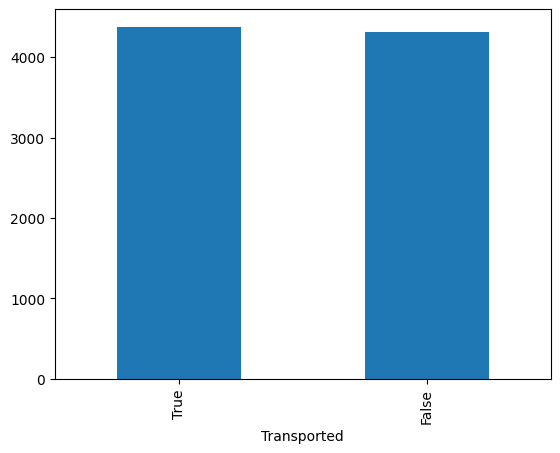

In [6]:
# Let us take a look at our target variable to find out if our dataset is balanced or not
tdf = tr['Transported'].value_counts()
tdf.plot(kind="bar")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

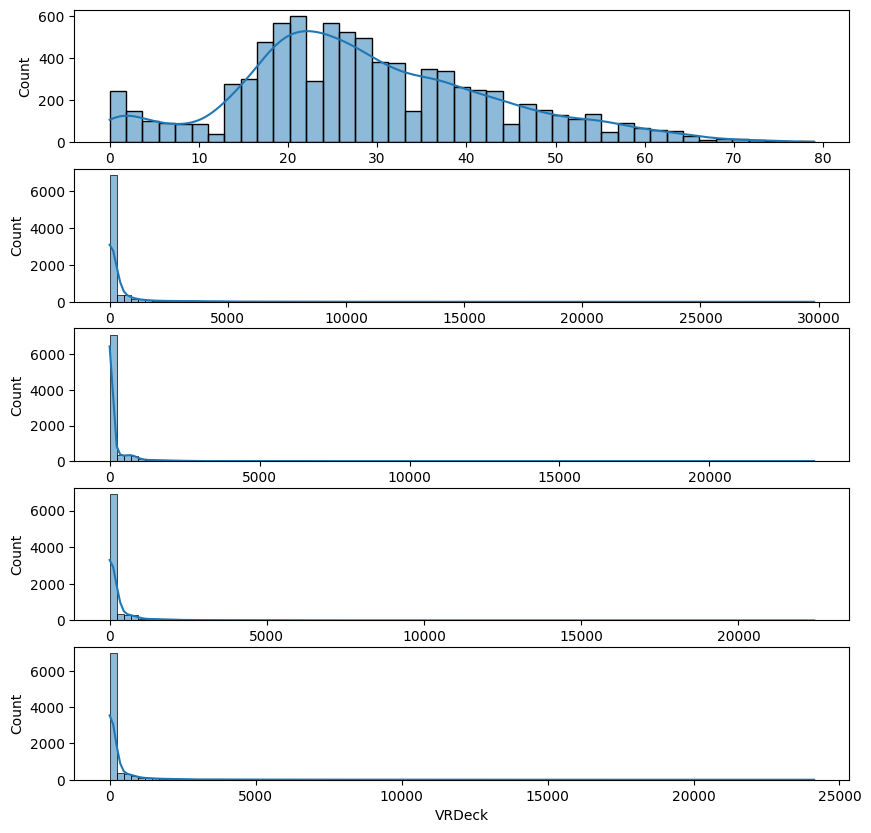

In [7]:
# Our data has a balanced Target Variable
# Let us look at some distributions of the continuous Values
fig, ax = plt.subplots(5,1,  figsize=(10, 10))

sns.histplot(tr['Age'], ax=ax[0],kde=True);
sns.histplot(tr['FoodCourt'], ax=ax[1],bins=100,kde=True);
sns.histplot(tr['ShoppingMall'],bins=100, ax=ax[2],kde=True);
sns.histplot(tr['Spa'], bins=100,ax=ax[3],kde=True);
sns.histplot(tr['VRDeck'], bins=100,ax=ax[4],kde=True);

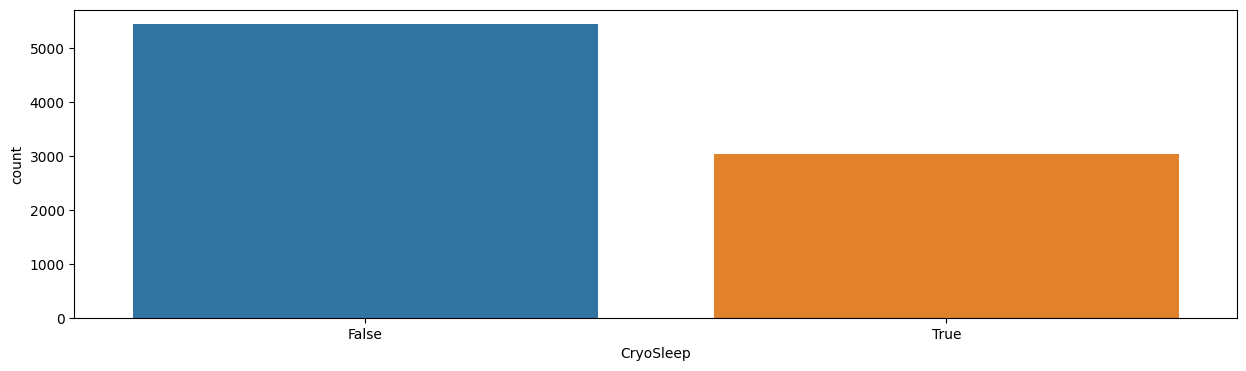

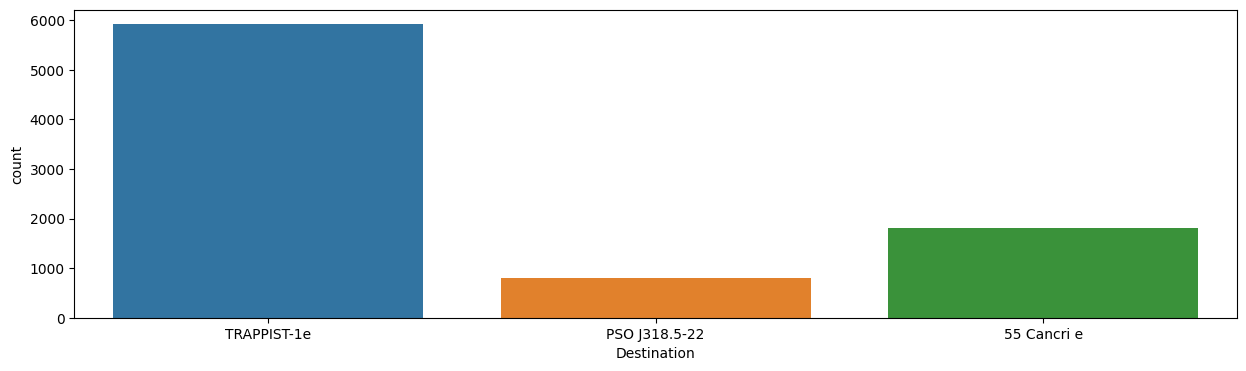

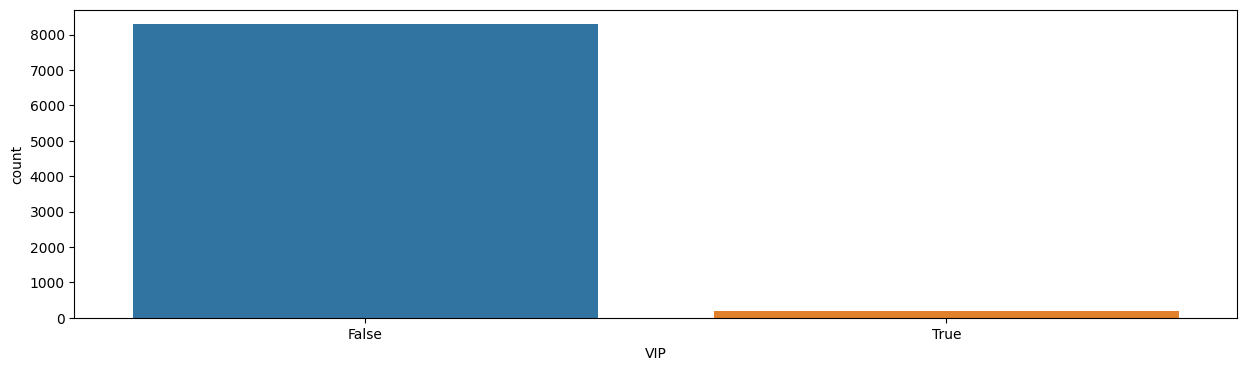

In [8]:
# Let us visualize some categorical variables
cols=['CryoSleep','Destination','VIP']
for col in cols:
    plt.figure(figsize=(15,4))
    sns.countplot(data=tr,x=col)
    plt.show()

****
# Data Preprocessing #
****

**For Training Set**

In [9]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


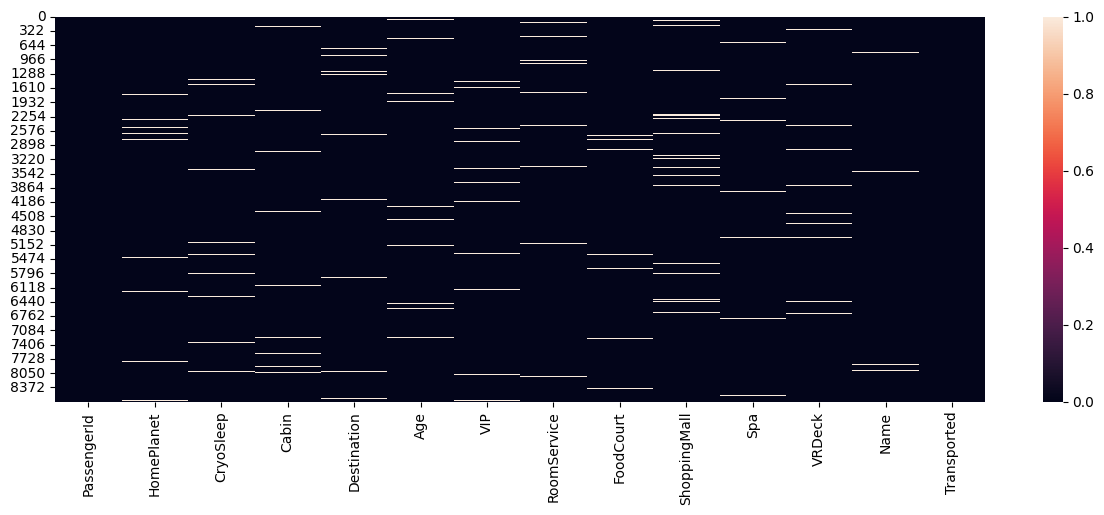

In [10]:
# Let us visualize if we have any null values using a heatmap #
plt.figure(figsize=(15,5))
sns.heatmap(tr.isnull())
plt.show()

In [11]:
# We do have some null values
# There are not a lot of them therefore let us fill the NA values using median or mode
# First let us see how many null values are present in each feature

tr.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [12]:
# Let us go one by one
tr['HomePlanet']=tr['HomePlanet'].fillna(tr['HomePlanet'].mode()[0])
tr['CryoSleep']=tr['CryoSleep'].fillna(tr['CryoSleep'].mode()[0])
tr['Destination']=tr['Destination'].fillna(tr['Destination'].mode()[0])
tr['Age']=tr['Age'].fillna(tr['Age'].median())
tr['VIP']=tr['VIP'].fillna(tr['VIP'].mode()[0])
tr[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]=tr[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(tr[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].median())

/tmp/ipykernel_17/3414005321.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tr['CryoSleep']=tr['CryoSleep'].fillna(tr['CryoSleep'].mode()[0])
/tmp/ipykernel_17/3414005321.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tr['VIP']=tr['VIP'].fillna(tr['VIP'].mode()[0])


In [13]:
# We have taken care of most of the features
# Two features are remaining Cabin and Name
# Name is not that useful for us at this moment so let us go ahead and drop it
tr=tr.drop(columns='Name')
# Let us look at the Cabin Feature
tr['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [14]:
# As Specified in the data description the Cabin feature is divided in the following format deck/num/side
# side is either P for Port or S for Starboard
# Our task for now is to split the Cabin feature into three different features Deck, Num and Side respectively
tr[['Deck','Num','Side']]=tr['Cabin'].str.split('/',expand=True)

# We have split the cabin feature successfully, let us drop the Cabin feature now
tr.drop(columns='Cabin',inplace=True)

In [15]:
# Let us check for null values now
print(tr.isnull().any())
print(tr.isnull().sum())

PassengerId     False
HomePlanet      False
CryoSleep       False
Destination     False
Age             False
VIP             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Transported     False
Deck             True
Num              True
Side             True
dtype: bool
PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Deck            199
Num             199
Side            199
dtype: int64


In [16]:
# We have null values and they are not that many so lets fill them
cols=['Deck','Num','Side']
for col in cols:
    print(tr[col].value_counts())

Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64
Num
82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: count, Length: 1817, dtype: int64
Side
S    4288
P    4206
Name: count, dtype: int64


In [17]:
tr['Deck'] = tr['Deck'].fillna(tr['Deck'].mode()[0])
tr['Side'] = tr['Side'].fillna(tr['Side'].mode()[0])
tr['Num'] = pd.to_numeric(tr['Num'], errors='coerce')
tr['Num'] = tr['Num'].fillna(tr['Num'].median())

In [18]:
# We have one more column to take care of i.e. PassengerId
# According to the data description PassengerId values takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group
# Let us split the PassengerId feature to extract the group and number within the group and proceed to drop PassengerId

tr[['Group','Number']]=tr['PassengerId'].str.split('_',expand=True)
tr.drop(columns='PassengerId',inplace=True)
tr['Group']=tr['Group'].astype(int)
tr['Number']=tr['Number'].astype(int)

In [19]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8693 non-null   object 
 12  Num           8693 non-null   float64
 13  Side          8693 non-null   object 
 14  Group         8693 non-null   int64  
 15  Number        8693 non-null   int64  
dtypes: bool(3), float64(7), int64(2), object(4)
memory usage: 908.5+ KB


In [20]:
# We have filled all the null values
# Let us first drop duplicates and then move on
tr.drop_duplicates(inplace=True)

In [21]:
# Let us make sure all our data is in the right data type format
# Let us start by converting all the boolean data type features into integers

for col in tr.columns[tr.dtypes=='bool']:
    tr[col]=tr[col].astype(int)
# Now let us view how our categorical columns are

for col in tr.columns[tr.dtypes=='object']:
    print(tr[col].value_counts(),'\n')

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64 

Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64 

Deck
F    2993
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64 

Side
S    4487
P    4206
Name: count, dtype: int64 



In [22]:
# We can either use One Hot Encoding or Label Encoding to change these categorical values to numerical
# In this notebook I would be using Label Encoder

# importing
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in tr.columns[tr.dtypes=='object']:
    tr[col]=le.fit_transform(tr[col])

In [23]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
 11  Deck          8693 non-null   int64  
 12  Num           8693 non-null   float64
 13  Side          8693 non-null   int64  
 14  Group         8693 non-null   int64  
 15  Number        8693 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 1.1 MB


In [24]:
# Our training dataset is cleaned and is ready
# Let us move on to our testing dataset and then go on to perform feature engineering

te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


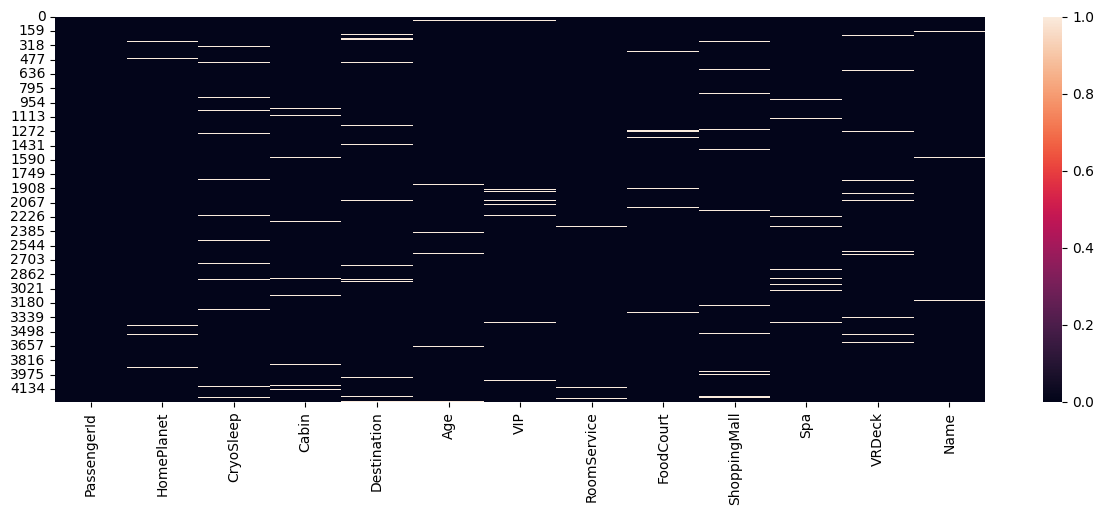

In [25]:
# Let us visualize if we have any null values using a heatmap #
plt.figure(figsize=(15,5))
sns.heatmap(te.isnull())
plt.show()

In [26]:
# We do have some null values
# There are not a lot of them therefore let us fill the NA values using median or mode
# First let us see how many null values are present in each feature

te.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [27]:
# Let us go one by one
te['HomePlanet']=te['HomePlanet'].fillna(te['HomePlanet'].mode()[0])
te['CryoSleep']=te['CryoSleep'].fillna(te['CryoSleep'].mode()[0])
te['Destination']=te['Destination'].fillna(te['Destination'].mode()[0])
te['Age']=te['Age'].fillna(te['Age'].median())
te['VIP']=te['VIP'].fillna(te['VIP'].mode()[0])
te[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]=te[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(tr[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].median())

/tmp/ipykernel_17/3007293875.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  te['CryoSleep']=te['CryoSleep'].fillna(te['CryoSleep'].mode()[0])
/tmp/ipykernel_17/3007293875.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  te['VIP']=te['VIP'].fillna(te['VIP'].mode()[0])


In [28]:
te=te.drop(columns='Name')
te[['Deck','Num','Side']]=te['Cabin'].str.split('/',expand=True)
te.drop(columns='Cabin',inplace=True)
te['Deck'] = te['Deck'].fillna(te['Deck'].mode()[0])
te['Side'] = te['Side'].fillna(te['Side'].mode()[0])
te['Num'] = pd.to_numeric(te['Num'], errors='coerce')
te['Num'] = te['Num'].fillna(te['Num'].median())
te[['Group','Number']]=te['PassengerId'].str.split('_',expand=True)
te.drop(columns='PassengerId',inplace=True)
te['Group']=te['Group'].astype(int)
te['Number']=te['Number'].astype(int)

for col in te.columns[te.dtypes=='bool']:
    te[col]=te[col].astype(int)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in te.columns[te.dtypes=='object']:
    te[col]=le.fit_transform(te[col])

In [29]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   int64  
 1   CryoSleep     4277 non-null   int64  
 2   Destination   4277 non-null   int64  
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   int64  
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
 10  Deck          4277 non-null   int64  
 11  Num           4277 non-null   float64
 12  Side          4277 non-null   int64  
 13  Group         4277 non-null   int64  
 14  Number        4277 non-null   int64  
dtypes: float64(7), int64(8)
memory usage: 501.3 KB


In [30]:
# Our testing dataset is also cleaned :)

****
# Feature Selection #
****

**This part of the notebook does not create any new features as of now, it simply helps in calculating the mutual information and visualizes both Mutual Information as well as correlation**

In [31]:
# importing
from sklearn.feature_selection import mutual_info_classif

In [32]:
# Copy of our training set
tdf=tr.copy()

x=tr.drop(columns='Transported')
y=tr['Transported']

# Calculating Mutual Information
mi=mutual_info_classif(x,y)
midf=pd.DataFrame({'Columns':x.columns,'Mutual Information':mi})
midf.sort_values(by='Mutual Information',inplace=True,ascending=False)

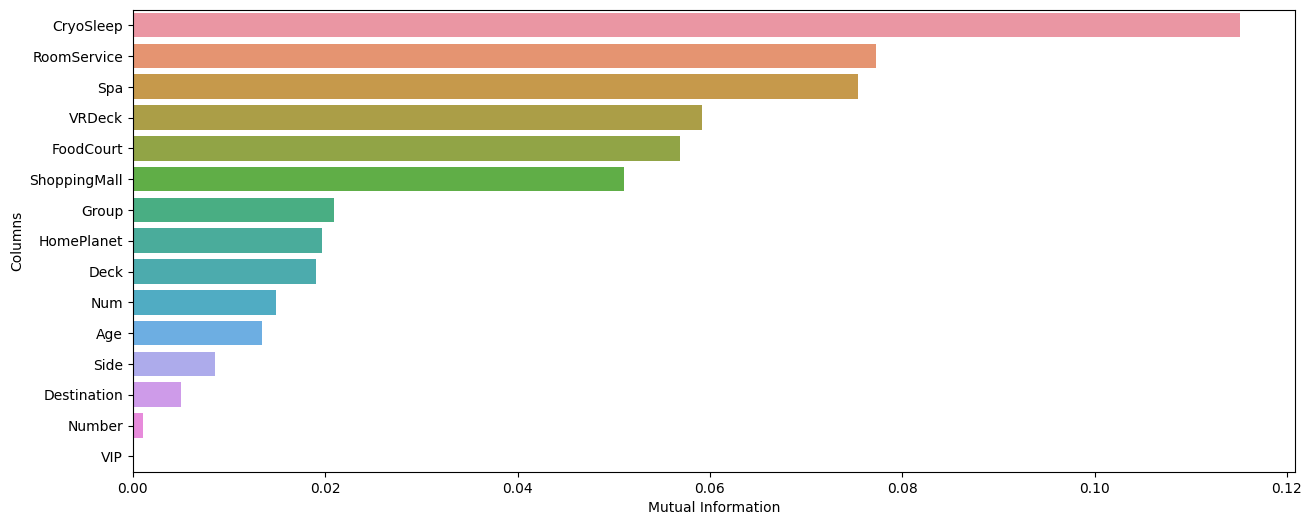

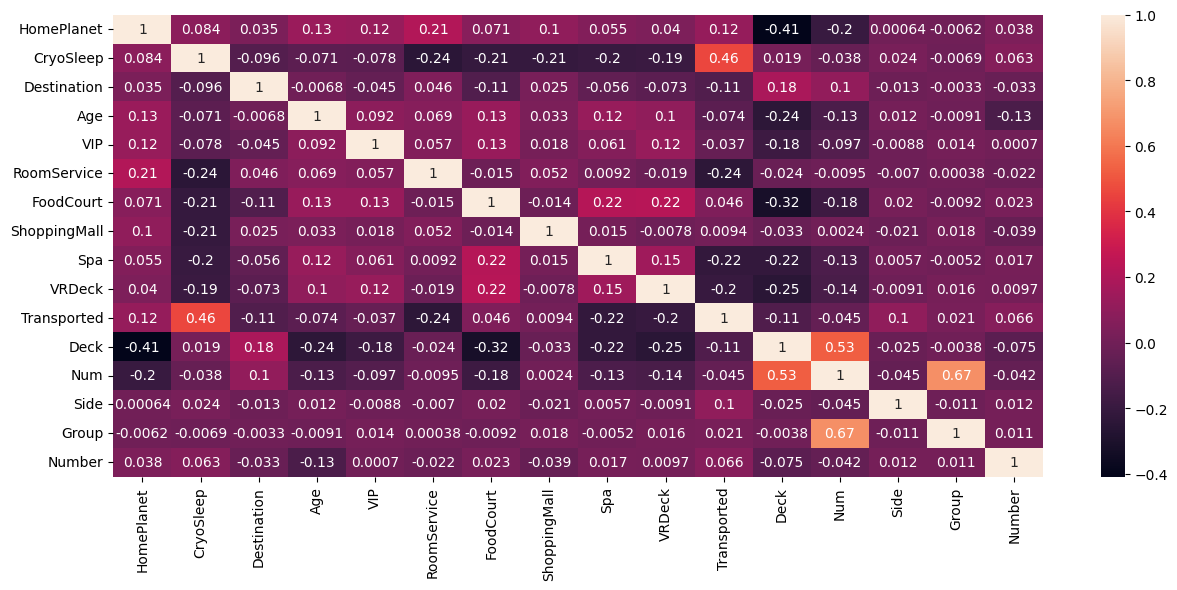

In [33]:
# Visuaizing Mutual Information and Correlation

plt.figure(figsize=(15,6))
sns.barplot(data=midf,y='Columns',x='Mutual Information')
plt.show()
plt.figure(figsize=(15,6))
sns.heatmap(tdf.corr(),annot=True)
plt.show()

****
# Data Preparation #
****

In [34]:
# training features are seperated to a Data Frame called and x and our target variable is in a dataframe called y
# te is our dataframe which contains out testing data
x=tr.drop(columns='Transported')
y=tr['Transported']

****
# Random Forest ##
****

In [35]:
# importing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [36]:
rf=RandomForestClassifier()
param={'n_estimators':[300],'max_depth':list(np.arange(2,201)),'min_samples_split':list(np.arange(2,201)),
       'min_samples_leaf':list(np.arange(1,201)), 'criterion':['gini','entropy'],
      'max_features':['sqrt','log2',None]}
nrf=RandomizedSearchCV(rf,param_distributions=param,n_iter=100,scoring='accuracy',n_jobs=-1,cv=10)
nrf.fit(x,y)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_

{'n_estimators': 300, 'min_samples_split': 104, 'min_samples_leaf': 35, 'max_features': 'log2', 'max_depth': 46, 'criterion': 'gini'}
0.7905273600253959


In [37]:
pred=nrf.predict(te)
pred=pred.astype(bool)

****
# Submission #
****

In [38]:
results_df = pd.DataFrame({
    'PassengerId':tte['PassengerId'], 
    'Transported': pred           
})
results_df.to_csv('out.csv',index=False)

****
# Feedback and Suggestions #
****

**Please Upvote if you liked this Notebook or if it has helped you in any way :)**

**Please provide feedback and suggestions to improve this notebook**